# Generating control gene set index
### for both non-amp and amp

# 1. Importing data
### 1.1 Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import Ecocyc_Parse as ep

pd.set_option('max_columns', 99)

%matplotlib inline
#%matplotlib notebook

In [2]:
countdf = pd.read_csv('countdata.txt', header = 0, index_col = 0, sep = '\t')
countdf.head()

,T1-L50-02,OD-L25-01,OD-L01-01,T1-L50-03,T1-L50-01,OD-L25-02,T0-L01-08,OD-L01-02,OD-L25-03,T1-L50-04,T1-L50-11,T1-L50-05,OD-L25-04,T1-L50-07,T1-L50-12,OD-L25-05,T1-L01-04,T1-L01-10,T1-L01-11,T1-L01-07,T1-L01-12,T1-L01-02,OD-L50-01,T0-L50-08,T0-L50-09,T0-L50-04,T0-L50-07,T0-L50-06,T0-L50-02,T0-L50-03,T1-L01-08,T0-L50-01,T1-L01-09,T0-L01-02,T0-L25-14,T1-L50-08,T1-L50-09,T0-L25-15,T0-L01-05,T0-L25-10,T0-L01-12,T0-L01-06,T0-L25-13
ECB_RS00005,51.0,388.0,137.0,24.0,43.0,239.0,355.0,76.0,453.0,64.0,19.0,52.0,229.0,23.0,25.0,225.0,173.0,61.0,95.0,352.0,41.0,59.0,1.0,184.0,253.0,226.0,179.0,307.0,298.0,268.0,29.0,380.0,208.0,89.0,969.0,17.0,31.0,689.0,439.0,3.0,234.0,424.0,520.0
ECB_RS00010,999.0,4459.0,44.0,750.0,771.0,3179.0,27.0,16.0,2578.0,1066.0,740.0,578.0,1842.0,818.0,620.0,2259.0,43.0,22.0,91.0,120.0,8.0,68.0,37.0,314.0,297.0,281.0,175.0,156.0,313.0,249.0,65.0,176.0,180.0,6.0,761.0,558.0,1007.0,579.0,111.0,4.0,15.0,79.0,642.0
ECB_RS00015,274.0,797.0,17.0,240.0,222.0,1015.0,11.0,8.0,677.0,297.0,254.0,149.0,427.0,304.0,181.0,717.0,11.0,10.0,34.0,54.0,1.0,24.0,21.0,111.0,102.0,132.0,63.0,61.0,129.0,120.0,31.0,67.0,89.0,3.0,192.0,209.0,357.0,153.0,46.0,3.0,9.0,33.0,166.0
ECB_RS00020,404.0,2212.0,15.0,268.0,309.0,1856.0,21.0,4.0,1534.0,415.0,292.0,220.0,958.0,355.0,209.0,1218.0,15.0,7.0,36.0,59.0,3.0,40.0,22.0,198.0,222.0,169.0,186.0,161.0,164.0,197.0,33.0,124.0,128.0,8.0,354.0,247.0,408.0,253.0,59.0,2.0,7.0,37.0,349.0
ECB_RS00030,78.0,678.0,40.0,62.0,76.0,420.0,14.0,17.0,569.0,104.0,57.0,63.0,309.0,88.0,53.0,318.0,10.0,3.0,14.0,23.0,1.0,5.0,6.0,79.0,120.0,89.0,98.0,85.0,64.0,108.0,6.0,67.0,57.0,3.0,186.0,40.0,85.0,137.0,20.0,3.0,4.0,15.0,166.0


# 4. Looking at the sparsity of the data

In [3]:
countdf.iloc[:,1:].apply(lambda x: x<5, axis = 0).sum(axis=0)

OD-L25-01     640
OD-L01-01    1522
T1-L50-03      31
T1-L50-01      20
OD-L25-02     780
T0-L01-08    1120
OD-L01-02    2447
OD-L25-03     807
T1-L50-04      14
T1-L50-11      27
T1-L50-05      34
OD-L25-04     890
T1-L50-07      27
T1-L50-12      30
OD-L25-05     871
T1-L01-04     648
T1-L01-10    1556
T1-L01-11     247
T1-L01-07     112
T1-L01-12    2670
T1-L01-02     409
OD-L50-01    3037
T0-L50-08      72
T0-L50-09     152
T0-L50-04     133
T0-L50-07     379
T0-L50-06     716
T0-L50-02      65
T0-L50-03     175
T1-L01-08     475
T0-L50-01     174
T1-L01-09     124
T0-L01-02    2311
T0-L25-14     242
T1-L50-08      36
T1-L50-09      16
T0-L25-15     502
T0-L01-05     155
T0-L25-10    4067
T0-L01-12    1395
T0-L01-06     200
T0-L25-13     515
dtype: int64

In [4]:
num_zeros = countdf.iloc[:,1:].apply(lambda x: x<5, axis = 0).sum(axis=0).values
num_zeros

array([ 640, 1522,   31,   20,  780, 1120, 2447,  807,   14,   27,   34,
        890,   27,   30,  871,  648, 1556,  247,  112, 2670,  409, 3037,
         72,  152,  133,  379,  716,   65,  175,  475,  174,  124, 2311,
        242,   36,   16,  502,  155, 4067, 1395,  200,  515])

(array([19.,  4.,  3.,  5.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  14.  ,  216.65,  419.3 ,  621.95,  824.6 , 1027.25, 1229.9 ,
        1432.55, 1635.2 , 1837.85, 2040.5 , 2243.15, 2445.8 , 2648.45,
        2851.1 , 3053.75, 3256.4 , 3459.05, 3661.7 , 3864.35, 4067.  ]),
 <a list of 20 Patch objects>)

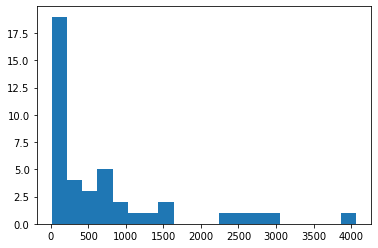

In [5]:
plt.hist(num_zeros, bins=20)

In [6]:
np.quantile(num_zeros, q = 0.8)+2*(np.quantile(num_zeros, q = 0.75)-np.quantile(num_zeros, q = 0.25))

2620.000000000001

In [7]:
countdf.iloc[:,1:].apply(lambda x: x<5, axis = 0).sum(axis=0)<2620.000000000001

OD-L25-01     True
OD-L01-01     True
T1-L50-03     True
T1-L50-01     True
OD-L25-02     True
T0-L01-08     True
OD-L01-02     True
OD-L25-03     True
T1-L50-04     True
T1-L50-11     True
T1-L50-05     True
OD-L25-04     True
T1-L50-07     True
T1-L50-12     True
OD-L25-05     True
T1-L01-04     True
T1-L01-10     True
T1-L01-11     True
T1-L01-07     True
T1-L01-12    False
T1-L01-02     True
OD-L50-01    False
T0-L50-08     True
T0-L50-09     True
T0-L50-04     True
T0-L50-07     True
T0-L50-06     True
T0-L50-02     True
T0-L50-03     True
T1-L01-08     True
T0-L50-01     True
T1-L01-09     True
T0-L01-02     True
T0-L25-14     True
T1-L50-08     True
T1-L50-09     True
T0-L25-15     True
T0-L01-05     True
T0-L25-10    False
T0-L01-12     True
T0-L01-06     True
T0-L25-13     True
dtype: bool

# 5. Control Genes index

The DE analysis with default setting over estimating lac01 expression. As far as I concern, I think lower counts sknewed the size factor estimation. A two step measure is taken into account:

- 1. remove all zeros
- 2. selecting IQR values as control genes. 

In [8]:
# The drop were made based on the sparcity
countdf_final = countdf.drop(["OD-L50-01", "T0-L25-10", "T1-L01-12"], axis = 1).copy()
countdf_final.shape, countdf.shape

((4490, 40), (4490, 43))

In [9]:
countdf_final.head(3)

,T1-L50-02,OD-L25-01,OD-L01-01,T1-L50-03,T1-L50-01,OD-L25-02,T0-L01-08,OD-L01-02,OD-L25-03,T1-L50-04,T1-L50-11,T1-L50-05,OD-L25-04,T1-L50-07,T1-L50-12,OD-L25-05,T1-L01-04,T1-L01-10,T1-L01-11,T1-L01-07,T1-L01-02,T0-L50-08,T0-L50-09,T0-L50-04,T0-L50-07,T0-L50-06,T0-L50-02,T0-L50-03,T1-L01-08,T0-L50-01,T1-L01-09,T0-L01-02,T0-L25-14,T1-L50-08,T1-L50-09,T0-L25-15,T0-L01-05,T0-L01-12,T0-L01-06,T0-L25-13
ECB_RS00005,51.0,388.0,137.0,24.0,43.0,239.0,355.0,76.0,453.0,64.0,19.0,52.0,229.0,23.0,25.0,225.0,173.0,61.0,95.0,352.0,59.0,184.0,253.0,226.0,179.0,307.0,298.0,268.0,29.0,380.0,208.0,89.0,969.0,17.0,31.0,689.0,439.0,234.0,424.0,520.0
ECB_RS00010,999.0,4459.0,44.0,750.0,771.0,3179.0,27.0,16.0,2578.0,1066.0,740.0,578.0,1842.0,818.0,620.0,2259.0,43.0,22.0,91.0,120.0,68.0,314.0,297.0,281.0,175.0,156.0,313.0,249.0,65.0,176.0,180.0,6.0,761.0,558.0,1007.0,579.0,111.0,15.0,79.0,642.0
ECB_RS00015,274.0,797.0,17.0,240.0,222.0,1015.0,11.0,8.0,677.0,297.0,254.0,149.0,427.0,304.0,181.0,717.0,11.0,10.0,34.0,54.0,24.0,111.0,102.0,132.0,63.0,61.0,129.0,120.0,31.0,67.0,89.0,3.0,192.0,209.0,357.0,153.0,46.0,9.0,33.0,166.0


### 5.1 Explore quantile of the whole dataframe

In [10]:
np.mean(countdf_final.iloc[:,1:].values.flatten())

271.0671199403771

In [11]:
np.quantile(np.log2(countdf_final.iloc[:,1:].values.flatten()+1), [0.25, 0.75])

array([3.9068906 , 7.23840474])

(array([4.5920e+03, 2.9000e+01, 4.2880e+03, 4.0400e+03, 7.0370e+03,
        6.1660e+03, 8.1590e+03, 9.0090e+03, 1.0942e+04, 1.3271e+04,
        1.2846e+04, 1.4555e+04, 1.2936e+04, 1.2696e+04, 1.2153e+04,
        1.1194e+04, 1.0178e+04, 7.9970e+03, 5.2420e+03, 2.8380e+03,
        1.6280e+03, 1.0000e+03, 6.6400e+02, 4.4400e+02, 3.1400e+02,
        2.7700e+02, 1.9300e+02, 1.3500e+02, 6.1000e+01, 5.8000e+01,
        3.1000e+01, 3.2000e+01, 2.6000e+01, 3.0000e+01, 1.6000e+01,
        9.0000e+00, 1.1000e+01, 7.0000e+00, 4.0000e+00, 2.0000e+00]),
 array([ 0.        ,  0.48615124,  0.97230247,  1.45845371,  1.94460494,
         2.43075618,  2.91690741,  3.40305865,  3.88920988,  4.37536112,
         4.86151235,  5.34766359,  5.83381482,  6.31996606,  6.80611729,
         7.29226853,  7.77841976,  8.264571  ,  8.75072223,  9.23687347,
         9.7230247 , 10.20917594, 10.69532717, 11.18147841, 11.66762964,
        12.15378088, 12.63993211, 13.12608335, 13.61223458, 14.09838582,
        14.58453

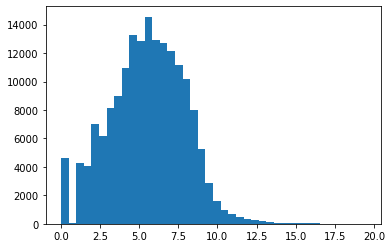

In [12]:
plt.hist(np.log2(countdf_final.iloc[:,1:].values.flatten()+1), bins = 40)

### 5.2 replace small values and remove zeros 

In [13]:
# all values less than threshold are changed to 0.
lowcount_threshold = 3
countdf_final.iloc[:,1:] = countdf_final.iloc[:,1:].where(countdf_final.iloc[:,1:]>lowcount_threshold, other = 0)
countdf_final

,T1-L50-02,OD-L25-01,OD-L01-01,T1-L50-03,T1-L50-01,OD-L25-02,T0-L01-08,OD-L01-02,OD-L25-03,T1-L50-04,T1-L50-11,T1-L50-05,OD-L25-04,T1-L50-07,T1-L50-12,OD-L25-05,T1-L01-04,T1-L01-10,T1-L01-11,T1-L01-07,T1-L01-02,T0-L50-08,T0-L50-09,T0-L50-04,T0-L50-07,T0-L50-06,T0-L50-02,T0-L50-03,T1-L01-08,T0-L50-01,T1-L01-09,T0-L01-02,T0-L25-14,T1-L50-08,T1-L50-09,T0-L25-15,T0-L01-05,T0-L01-12,T0-L01-06,T0-L25-13
ECB_RS00005,51.0,388.0,137.0,24.0,43.0,239.0,355.0,76.0,453.0,64.0,19.0,52.0,229.0,23.0,25.0,225.0,173.0,61.0,95.0,352.0,59.0,184.0,253.0,226.0,179.0,307.0,298.0,268.0,29.0,380.0,208.0,89.0,969.0,17.0,31.0,689.0,439.0,234.0,424.0,520.0
ECB_RS00010,999.0,4459.0,44.0,750.0,771.0,3179.0,27.0,16.0,2578.0,1066.0,740.0,578.0,1842.0,818.0,620.0,2259.0,43.0,22.0,91.0,120.0,68.0,314.0,297.0,281.0,175.0,156.0,313.0,249.0,65.0,176.0,180.0,6.0,761.0,558.0,1007.0,579.0,111.0,15.0,79.0,642.0
ECB_RS00015,274.0,797.0,17.0,240.0,222.0,1015.0,11.0,8.0,677.0,297.0,254.0,149.0,427.0,304.0,181.0,717.0,11.0,10.0,34.0,54.0,24.0,111.0,102.0,132.0,63.0,61.0,129.0,120.0,31.0,67.0,89.0,0.0,192.0,209.0,357.0,153.0,46.0,9.0,33.0,166.0
ECB_RS00020,404.0,2212.0,15.0,268.0,309.0,1856.0,21.0,4.0,1534.0,415.0,292.0,220.0,958.0,355.0,209.0,1218.0,15.0,7.0,36.0,59.0,40.0,198.0,222.0,169.0,186.0,161.0,164.0,197.0,33.0,124.0,128.0,8.0,354.0,247.0,408.0,253.0,59.0,7.0,37.0,349.0
ECB_RS00030,78.0,678.0,40.0,62.0,76.0,420.0,14.0,17.0,569.0,104.0,57.0,63.0,309.0,88.0,53.0,318.0,10.0,0.0,14.0,23.0,5.0,79.0,120.0,89.0,98.0,85.0,64.0,108.0,6.0,67.0,57.0,0.0,186.0,40.0,85.0,137.0,20.0,4.0,15.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ECB_RS22800,165.0,1190.0,3097.0,111.0,125.0,921.0,2390.0,1038.0,1087.0,172.0,111.0,85.0,816.0,172.0,89.0,656.0,312.0,97.0,166.0,641.0,155.0,501.0,601.0,360.0,457.0,717.0,261.0,470.0,71.0,506.0,460.0,544.0,581.0,83.0,165.0,457.0,1524.0,924.0,1499.0,577.0
ECB_RS22805,55.0,498.0,947.0,51.0,58.0,323.0,1206.0,392.0,272.0,63.0,60.0,32.0,283.0,54.0,36.0,282.0,163.0,29.0,73.0,311.0,61.0,159.0,146.0,127.0,118.0,196.0,74.0,161.0,48.0,188.0,162.0,274.0,240.0,40.0,48.0,234.0,733.0,478.0,756.0,202.0
ECB_RS22810,211.0,26.0,0.0,225.0,197.0,17.0,19.0,5.0,12.0,248.0,226.0,137.0,27.0,235.0,154.0,45.0,4.0,0.0,18.0,39.0,16.0,90.0,68.0,54.0,55.0,52.0,50.0,63.0,18.0,64.0,44.0,4.0,61.0,165.0,293.0,42.0,34.0,5.0,19.0,44.0
pGFP,473.0,9422.0,2120.0,232.0,397.0,9998.0,23499.0,1065.0,5173.0,498.0,309.0,295.0,2336.0,263.0,269.0,5438.0,812.0,239.0,450.0,1159.0,273.0,9740.0,10674.0,5544.0,8563.0,11826.0,3999.0,8505.0,161.0,12510.0,4556.0,5571.0,26644.0,203.0,326.0,28910.0,15511.0,8193.0,13754.0,28874.0


In [14]:
# remove all zero rows
countdf_na_no_zero = countdf_final.replace(0, np.nan).dropna(how = "any", axis = 0)
countdf_na_no_zero.shape

(1603, 40)

In [15]:
(countdf_na_no_zero.iloc[:,1:]<lowcount_threshold).sum().sum()

0

### 5.3 Explore the dataset

In [16]:
countdf_na_no_zero.iloc[:, 1:].apply(np.log2).quantile([0.25, 0.75])

,OD-L25-01,OD-L01-01,T1-L50-03,T1-L50-01,OD-L25-02,T0-L01-08,OD-L01-02,OD-L25-03,T1-L50-04,T1-L50-11,T1-L50-05,OD-L25-04,T1-L50-07,T1-L50-12,OD-L25-05,T1-L01-04,T1-L01-10,T1-L01-11,T1-L01-07,T1-L01-02,T0-L50-08,T0-L50-09,T0-L50-04,T0-L50-07,T0-L50-06,T0-L50-02,T0-L50-03,T1-L01-08,T0-L50-01,T1-L01-09,T0-L01-02,T0-L25-14,T1-L50-08,T1-L50-09,T0-L25-15,T0-L01-05,T0-L01-12,T0-L01-06,T0-L25-13
0.25,6.228819,4.754888,7.082139,7.139551,5.894767,4.754888,3.169925,5.754888,7.592457,7.169925,6.741467,5.491853,7.257388,6.741467,5.643856,4.087463,3.000000,4.857981,5.781360,4.321928,6.409391,5.930737,6.066089,5.087463,5.087463,6.209453,5.78136,4.087463,5.857981,5.832890,3.000000,6.000000,6.845490,7.503820,5.554589,5.807355,4.000000,5.475642,5.643856
0.75,9.486835,7.430446,8.519636,8.558421,8.980140,7.189825,5.977280,8.888714,8.982994,8.564148,8.108524,8.857981,8.667110,8.113742,9.002815,5.672425,4.523562,5.977280,6.988685,5.523562,7.870365,7.870365,7.727920,7.303781,7.658211,7.596185,7.72792,5.321928,7.787280,7.257388,5.426265,8.573642,8.271463,8.899356,8.296914,7.257388,6.257357,7.044394,8.361944


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124431510>,
      dtype=object)

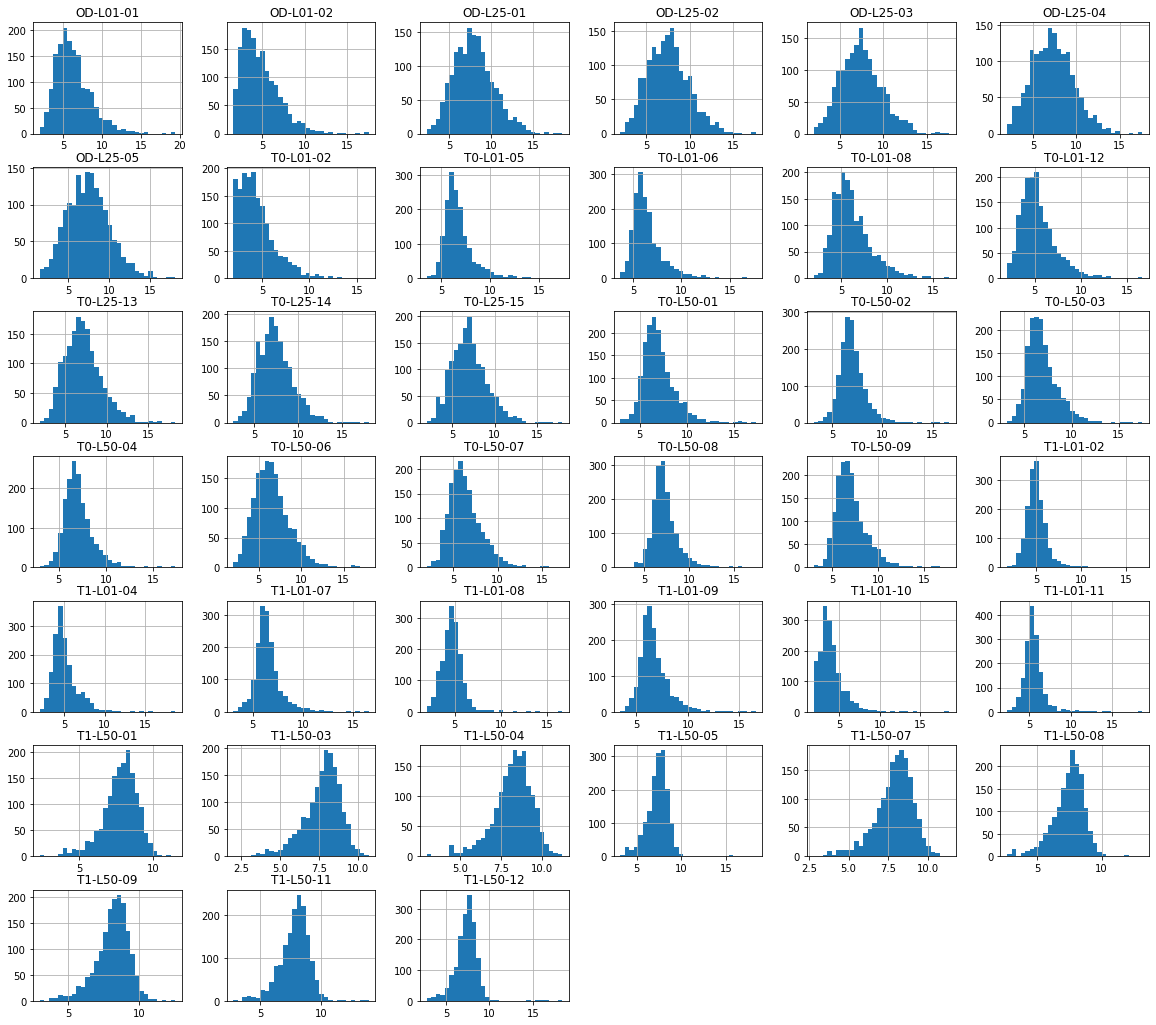

In [17]:
# The skewness greatly decrease as converting the original read into log scale.
countdf_na_no_zero.iloc[:, 1:].apply(np.log2).hist(bins = 30, figsize = (20, 18))

It's interesting that just by observing the histogram, in the moderate lactose condition, the gene expression seems more relaxed, while in both lac01 and lac50, the gene expression are more spiked. Using median as the size factor is based on the hypothesis that the median of gene expression should be somewhere similar, but would be a bad hypothesis if the regulation mechinism is different in the whole. Or the control genes are the minority, that were somehwere off the median. 

The idea is that ensential genes tend to be more conserved in regulations. Also, non regulated genes might also be useful control gene set.

### 5.5 Non regulated genes.

### note: this part is necessary for DE analysis

In [18]:
ann_file = "HelpFiles/AnnConversion/ncbi_rel606_ecyc_k12_ann_matching_final.csv"
rg_synonym_file = "HelpFiles/RegulonDB/object_synonym.txt"
rg_genet_file = "HelpFiles/RegulonDB/genetic_network.txt"

In [19]:
ann = pd.read_csv(ann_file, header = 0, index_col=0)
rg_synonym = pd.read_csv(rg_synonym_file, header = None, sep="\t", comment="#")
rg_genet = pd.read_csv(rg_genet_file, header = None, sep="\t", comment="#")

In [20]:
ann[["rel606_gene_id", "BLATTNER-ID"]].head(3)

,rel606_gene_id,BLATTNER-ID
0,ECB_RS00005,b0001
1,ECB_RS00010,b0002
2,ECB_RS00015,b0003


In [21]:
rg_synonym.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [22]:
rg_synonym.columns = ["ECK_ID", "Synonym", "no1", "no2"]
rg_synonym.iloc[:,0:2].head(3)

,ECK_ID,Synonym
0,ECK120000001,b4053
1,ECK120000001,ECK4045
2,ECK120000001,alr5


In [23]:
rg_genet.columns = ["TF_ID", "no1", "Gene_ID", "no2", "no3", "no4", "no5", "type" ]
rg_genet.head(3)

,TF_ID,no1,Gene_ID,no2,no3,no4,no5,type
0,ECK120011186,Fis,ECK120002568,gadA,-,Gene expression analysis;Automated inference b...,tf,gene
1,ECK120011186,Fis,ECK120002695,nanT,-,Gene expression analysis;Automated inference b...,tf,gene
2,ECK120011186,Fis,ECK120003214,hlyE,-,Gene expression analysis;Automated inference b...,tf,gene


#### 5.3.1 Merge ECB_RS and b_num

In [24]:
ecb_b_eck = pd.merge(
    left = ann[["rel606_gene_id", "BLATTNER-ID"]],
    right = rg_synonym.iloc[:,0:2],
    how = "left",
    left_on = "BLATTNER-ID",
    right_on = "Synonym"
)
ecb_b_eck.dropna(inplace = True)
ecb_b_eck.head(3)

,rel606_gene_id,BLATTNER-ID,ECK_ID,Synonym
0,ECB_RS00005,b0001,ECK120001251,b0001
1,ECB_RS00010,b0002,ECK120000987,b0002
2,ECB_RS00015,b0003,ECK120000988,b0003


In [25]:
ecb_b_eck.isna().sum()

rel606_gene_id    0
BLATTNER-ID       0
ECK_ID            0
Synonym           0
dtype: int64

####  5.3.2 Merge ECB_RS & b# with ECK# 

In [26]:
regulate = pd.merge(
    left = rg_genet[["Gene_ID"]],
    right = ecb_b_eck[["rel606_gene_id", "ECK_ID", "Synonym"]],
    how = "inner", 
    left_on = "Gene_ID",
    right_on = "ECK_ID"
)
regulate

,Gene_ID,rel606_gene_id,ECK_ID,Synonym
0,ECK120002568,ECB_RS17810,ECK120002568,b3517
1,ECK120002568,ECB_RS17810,ECK120002568,b3517
2,ECK120002568,ECB_RS17810,ECK120002568,b3517
3,ECK120002568,ECB_RS17810,ECK120002568,b3517
4,ECK120002568,ECB_RS17810,ECK120002568,b3517
...,...,...,...,...
6535,ECK120002045,ECB_RS03400,ECK120002045,b0688
6536,ECK120002086,ECB_RS03395,ECK120002086,b0687
6537,ECK120002194,ECB_RS00640,ECK120002194,b0123
6538,ECK120002089,ECB_RS13335,ECK120002089,b2671


In [27]:
unique_ecb_regulated = regulate["rel606_gene_id"].dropna()
unique_ecb_regulated.drop_duplicates(inplace = True)
len(unique_ecb_regulated)

2121

In [28]:
no_regulation = list(set(countdf_na_no_zero.index)-set(unique_ecb_regulated))
no_regulation[-3:]

['ECB_RS04605', 'ECB_RS09525', 'ECB_RS20510']

In [29]:
len(no_regulation)

722

In [30]:
countdf.reset_index(inplace=True)

In [31]:
#save the dataframe into .csv file
countdf[countdf.loc[:,"index"].isin(no_regulation)].to_csv("HelpFiles/counts_no_regulatroy.csv")

In [32]:
control_index = countdf[countdf.loc[:,"index"].isin(no_regulation)].index

In [33]:
np.savetxt("HelpFiles/non_regulated_gene_index_for_R.txt",[control_index], fmt="%1.0d", delimiter=",")